In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data cleaning process

# 1. Read csv into dataframe using pandas

In [2]:
dengue_features_train=pd.read_csv('dengue_features_train.csv')
dengue_labels_train= pd.read_csv('dengue_labels_train.csv')

# 2. Join two data sets

In [3]:
# Join the training features and Labale to analysing them

new_train_set = pd.merge(dengue_features_train,dengue_labels_train, how='left', left_on =['city','year','weekofyear'], right_on=['city','year','weekofyear'])

In [4]:
new_train_set.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


# 3. split new_train_set data into two different dataframe based on city

In [5]:
df_sj = new_train_set[new_train_set["city"] == "sj"] #dataset for San Juan
df_iq = new_train_set[new_train_set["city"] == "iq"] #dataset for Iquitos

In [6]:
df_sj.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [7]:
df_sj.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,936.000000,936.000000,745.000000,887.000000,917.000000,917.000000,927.000000,930.000000,930.000000,930.000000,...,930.000000,927.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,936.000000
mean,1998.826923,26.503205,0.057925,0.067469,0.177655,0.165956,35.470809,299.163653,299.276920,295.109519,...,78.568181,35.470809,16.552409,2.516267,27.006528,6.757373,31.607957,22.600645,26.785484,34.180556
std,5.212076,15.021909,0.107153,0.092479,0.057166,0.056073,44.606137,1.236429,1.218637,1.569943,...,3.389488,44.606137,1.560923,0.498892,1.415473,0.835993,1.717297,1.506277,29.325811,51.381372
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,295.938571,296.114286,289.642857,...,66.735714,0.000000,11.715714,1.357143,22.842857,4.528571,26.700000,17.800000,0.000000,0.000000
25%,1994.000000,13.750000,0.004500,0.016425,0.139283,0.129157,0.000000,298.195000,298.300000,293.847857,...,76.246071,0.000000,15.236429,2.157143,25.842857,6.200000,30.600000,21.700000,6.825000,9.000000
50%,1999.000000,26.500000,0.057700,0.068075,0.177186,0.165971,20.800000,299.254286,299.378571,295.464286,...,78.667857,20.800000,16.845714,2.457143,27.228571,6.757143,31.700000,22.800000,17.750000,19.000000
75%,2003.000000,39.250000,0.111100,0.115200,0.212557,0.202771,52.180000,300.132857,300.228571,296.418929,...,80.963214,52.180000,17.858571,2.800000,28.185714,7.285714,32.800000,23.900000,35.450000,37.000000
max,2008.000000,53.000000,0.493400,0.437100,0.393129,0.381420,390.600000,302.200000,302.164286,297.795714,...,87.575714,390.600000,19.440000,4.428571,30.071429,9.914286,35.600000,25.600000,305.900000,461.000000


In [8]:
df_iq.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


In [9]:
df_iq.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,520.000000,520.000000,517.000000,517.000000,517.000000,517.000000,516.000000,516.000000,516.000000,516.000000,...,516.000000,516.000000,516.000000,516.000000,483.000000,483.000000,506.000000,512.000000,504.000000,520.000000
mean,2005.000000,26.503846,0.263869,0.238783,0.250126,0.266779,64.245736,297.869538,299.133043,295.492982,...,88.639117,64.245736,17.096110,9.206783,27.530933,10.566197,34.004545,21.196680,62.467262,7.565385
std,2.918283,15.029450,0.081370,0.076751,0.077354,0.086345,35.218995,1.170997,1.332073,1.417229,...,7.583889,35.218995,1.445769,2.448525,0.921769,1.535496,1.325261,1.260327,63.245958,10.765478
min,2000.000000,1.000000,0.061729,0.035860,0.029880,0.064183,0.000000,294.635714,294.892857,290.088571,...,57.787143,0.000000,12.111429,3.714286,21.400000,5.200000,30.100000,14.700000,0.000000,0.000000
25%,2002.750000,13.750000,0.200000,0.179540,0.194743,0.204129,39.105000,297.092500,298.221429,294.593929,...,84.295000,39.105000,16.102857,7.371429,27.000000,9.500000,33.200000,20.600000,17.200000,1.000000
50%,2005.000000,26.500000,0.263643,0.232971,0.249800,0.262143,60.470000,297.822857,299.121429,295.852143,...,90.917143,60.470000,17.428571,8.964286,27.600000,10.625000,34.000000,21.300000,45.300000,5.000000
75%,2007.250000,39.250000,0.319971,0.293929,0.302300,0.325150,85.757500,298.649286,300.123214,296.548571,...,94.563929,85.757500,18.180357,11.014286,28.100000,11.655000,34.900000,22.000000,85.950000,9.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,210.830000,301.637143,302.928571,298.450000,...,98.610000,210.830000,20.461429,16.028571,30.800000,15.800000,42.200000,24.200000,543.300000,116.000000


# 4. Remove duplicates

In [10]:
df_sj.drop_duplicates()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,sj,2008,13,2008-03-25,0.077850,-0.039900,0.310471,0.296243,27.19,296.958571,...,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8,4
932,sj,2008,14,2008-04-01,-0.038000,-0.016833,0.119371,0.066386,3.82,298.081429,...,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5,3
933,sj,2008,15,2008-04-08,-0.155200,-0.052750,0.137757,0.141214,16.96,297.460000,...,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7,1
934,sj,2008,16,2008-04-15,0.001800,NaN,0.203900,0.209843,0.00,297.630000,...,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2,3


In [11]:
df_iq.drop_duplicates()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


# 5. Check for nulls in two dataframes and replace values

In [12]:
#check null values in df_sj
df_sj.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_mi

In [13]:
# Replace nulls in df_sj
# Deal with NULL values
# I used avarage value for temperater feature to fill the NULL values

# replacing na values with previeus value  with limitation of 3 days 
df_sj['reanalysis_air_temp_k'].fillna(method='ffill',limit=3,inplace=True)
df_sj['reanalysis_tdtr_k'].fillna(method='ffill',limit=3,inplace=True)
df_sj['station_diur_temp_rng_c'].fillna(method='ffill',limit=4,inplace=True)
df_sj['ndvi_nw'].fillna(method='ffill',limit=3,inplace=True)
df_sj['ndvi_se'].fillna(method='ffill',limit=3,inplace=True)
df_sj['ndvi_sw'].fillna(method='ffill',limit=3,inplace=True)
df_sj['ndvi_ne'].fillna(method='ffill',limit=3,inplace=True)


# replacing na values with average value
df_sj['reanalysis_avg_temp_k'].fillna(df_sj['reanalysis_avg_temp_k'].mean(),inplace=True)
df_sj['reanalysis_dew_point_temp_k'].fillna(df_sj['reanalysis_dew_point_temp_k'].mean(),inplace=True)
df_sj['reanalysis_max_air_temp_k'].fillna(df_sj['reanalysis_max_air_temp_k'].mean(),inplace=True)
df_sj['reanalysis_min_air_temp_k'].fillna(df_sj['reanalysis_min_air_temp_k'].mean(),inplace=True)
df_sj['reanalysis_precip_amt_kg_per_m2'].fillna(df_sj['reanalysis_precip_amt_kg_per_m2'].mean(),inplace=True)
df_sj['reanalysis_specific_humidity_g_per_kg'].fillna(df_sj['reanalysis_specific_humidity_g_per_kg'].mean(),inplace=True)
df_sj['station_avg_temp_c'].fillna(df_sj['station_avg_temp_c'].mean(),inplace=True)
df_sj['station_min_temp_c'].fillna(df_sj['station_min_temp_c'].mean(),inplace=True)
df_sj['station_max_temp_c'].fillna(df_sj['station_max_temp_c'].mean(),inplace=True)
df_sj['station_precip_mm'].fillna(df_sj['station_precip_mm'].mean(),inplace=True)
df_sj['precipitation_amt_mm'].fillna(df_sj['precipitation_amt_mm'].mean(),inplace=True)
df_sj['reanalysis_relative_humidity_percent'].fillna(df_sj['reanalysis_relative_humidity_percent'].mean(),inplace=True)


# fill nul values with the next value
df_sj['ndvi_nw'].fillna(method='ffill',limit=3,inplace=True)
df_sj['ndvi_se'].fillna(method='ffill',limit=3,inplace=True)
df_sj['ndvi_sw'].fillna(method='ffill',limit=3,inplace=True)
df_sj['ndvi_ne'].fillna(method='ffill',limit=3,inplace=True)

C:\anaconda3\lib\site-packages\pandas\core\generic.py:6244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [14]:
# Check if nulls are replaced
df_sj.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  9
ndvi_nw                                  9
ndvi_se                                  8
ndvi_sw                                  8
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             9
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [15]:
# Replace nulls in df_iq
# Deal with NULL values
# I used avarage value for temperater feature to fill the NULL values

# replacing na values with previeus value  with limitation of 3 days 
df_iq['reanalysis_air_temp_k'].fillna(method='ffill',limit=3,inplace=True)
df_iq['reanalysis_tdtr_k'].fillna(method='ffill',limit=3,inplace=True)
df_iq['station_diur_temp_rng_c'].fillna(method='ffill',limit=4,inplace=True)
df_iq['ndvi_nw'].fillna(method='ffill',limit=3,inplace=True)
df_iq['ndvi_se'].fillna(method='ffill',limit=3,inplace=True)
df_iq['ndvi_sw'].fillna(method='ffill',limit=3,inplace=True)
df_iq['ndvi_ne'].fillna(method='ffill',limit=3,inplace=True)


# replacing na values with average value
df_iq['reanalysis_avg_temp_k'].fillna(df_iq['reanalysis_avg_temp_k'].mean(),inplace=True)
df_iq['reanalysis_dew_point_temp_k'].fillna(df_iq['reanalysis_dew_point_temp_k'].mean(),inplace=True)
df_iq['reanalysis_max_air_temp_k'].fillna(df_iq['reanalysis_max_air_temp_k'].mean(),inplace=True)
df_iq['reanalysis_min_air_temp_k'].fillna(df_iq['reanalysis_min_air_temp_k'].mean(),inplace=True)
df_iq['reanalysis_precip_amt_kg_per_m2'].fillna(df_iq['reanalysis_precip_amt_kg_per_m2'].mean(),inplace=True)
df_iq['reanalysis_specific_humidity_g_per_kg'].fillna(df_iq['reanalysis_specific_humidity_g_per_kg'].mean(),inplace=True)
df_iq['station_avg_temp_c'].fillna(df_iq['station_avg_temp_c'].mean(),inplace=True)
df_iq['station_min_temp_c'].fillna(df_iq['station_min_temp_c'].mean(),inplace=True)
df_iq['station_max_temp_c'].fillna(df_iq['station_max_temp_c'].mean(),inplace=True)
df_iq['station_precip_mm'].fillna(df_iq['station_precip_mm'].mean(),inplace=True)
df_iq['precipitation_amt_mm'].fillna(df_iq['precipitation_amt_mm'].mean(),inplace=True)
df_iq['reanalysis_relative_humidity_percent'].fillna(df_iq['reanalysis_relative_humidity_percent'].mean(),inplace=True)


# fill nul values with the next value
df_iq['ndvi_nw'].fillna(method='ffill',limit=3,inplace=True)
df_iq['ndvi_se'].fillna(method='ffill',limit=3,inplace=True)
df_iq['ndvi_sw'].fillna(method='ffill',limit=3,inplace=True)
df_iq['ndvi_ne'].fillna(method='ffill',limit=3,inplace=True)

C:\anaconda3\lib\site-packages\pandas\core\generic.py:6244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [16]:
# check if nulls are replaced
df_iq.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             4
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  3
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [17]:
#Union two data frame into one data frame and override to new_train_set

new_train_set=pd.concat([df_sj,df_iq])
new_train_set.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1447.000000,1447.000000,1448.000000,1448.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1443.000000,1456.000000,1456.000000,1456.000000,1453.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,0.131803,0.128390,0.203198,0.202038,45.747569,298.697965,299.225535,295.246470,...,82.164944,45.760388,16.746588,4.898656,27.193816,8.085892,32.463881,22.099229,39.528976,24.675137
std,5.408314,15.019437,0.138793,0.119862,0.074186,0.083820,43.538117,1.361950,1.257386,1.522631,...,7.141085,43.715537,1.537344,3.542340,1.274324,2.124853,1.952472,1.568237,47.164097,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.038333,0.048083,0.153825,0.143929,9.960000,297.654643,298.264286,294.130357,...,77.226429,9.800000,15.561429,2.328571,26.328571,6.528571,31.100000,21.100000,8.850000,5.000000
50%,2002.000000,26.500000,0.115950,0.117300,0.195764,0.189536,38.170000,298.646429,299.276920,295.625714,...,80.287857,38.340000,17.084286,2.857143,27.446429,7.342857,32.800000,22.200000,24.450000,12.000000
75%,2005.000000,39.250000,0.232607,0.213979,0.248037,0.246918,70.047500,299.827500,300.207143,296.456071,...,86.437500,70.235000,17.974643,7.617857,28.128571,9.600000,33.900000,23.300000,55.525000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [18]:
#Check if nulls are replaced in new_train_set 
new_train_set.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                   9
ndvi_nw                                   9
ndvi_se                                   8
ndvi_sw                                   8
precipitation_amt_mm                      0
reanalysis_air_temp_k                     0
reanalysis_avg_temp_k                     0
reanalysis_dew_point_temp_k               0
reanalysis_max_air_temp_k                 0
reanalysis_min_air_temp_k                 0
reanalysis_precip_amt_kg_per_m2           0
reanalysis_relative_humidity_percent      0
reanalysis_sat_precip_amt_mm             13
reanalysis_specific_humidity_g_per_kg     0
reanalysis_tdtr_k                         0
station_avg_temp_c                        0
station_diur_temp_rng_c                   3
station_max_temp_c                        0
station_min_temp_c              

# 6. Total Cases trend based on City and time

In [19]:
#find the relationship between total cases, city and (year, week of yer)
df_year_week_city = new_train_set[['year', 'weekofyear','city','total_cases']]
df_year_week_city.head()


,year,weekofyear,city,total_cases
0,1990,18,sj,4
1,1990,19,sj,5
2,1990,20,sj,4
3,1990,21,sj,3
4,1990,22,sj,6


# 6.(1) Plot cases over time by city

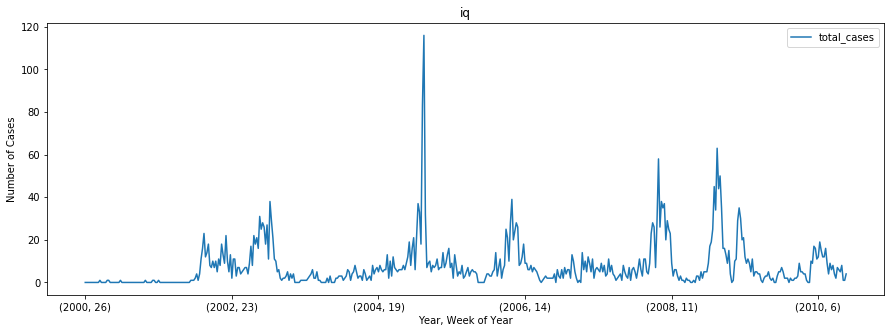

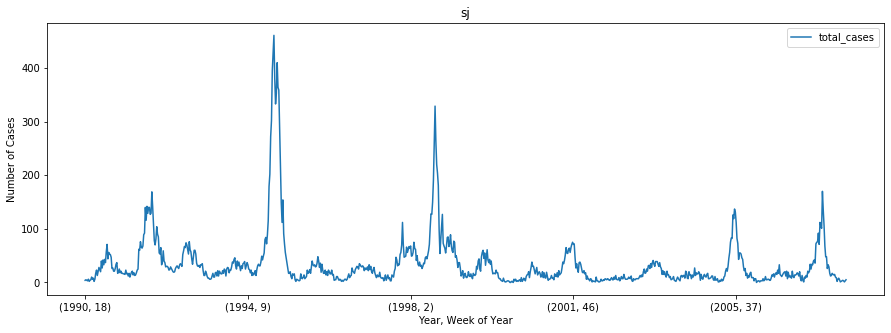

In [20]:

df_year_week_city = df_year_week_city.set_index(['year', 'weekofyear'])

for i in ['iq', 'sj']:
    data = df_year_week_city[df_year_week_city['city'] == i]
    data.plot(figsize = (15,5))
    plt.title(str(i))
    plt.xlabel("Year, Week of Year")
    plt.ylabel("Number of Cases")

In [21]:
print ("San Jose cases - Mean: {} and STD: {}".format(df_sj['total_cases'].mean(), df_sj['total_cases'].std()))
print ("Iquitos cases - Mean: {} and STD: {}".format(df_iq['total_cases'].mean(), df_iq['total_cases'].std()))


San Jose cases - Mean: 34.18055555555556 and STD: 51.38137249715158
Iquitos cases - Mean: 7.565384615384615 and STD: 10.765478342208679


# 6.(2) Plot cases for each week and each year by city

Text(0, 0.5, 'Number of Cases')

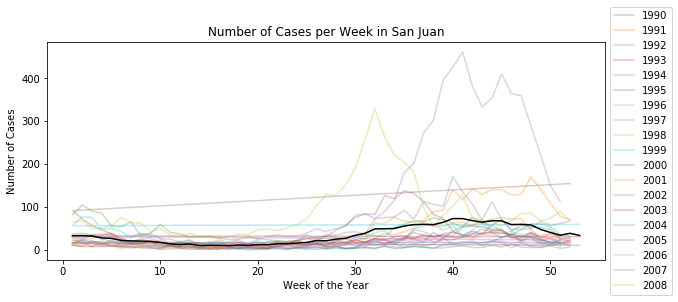

In [22]:

# plot cases for each week each year in san juan

for i in set(df_sj['year']):
    df = df_sj[df_sj['year'] == i]
    df.set_index('weekofyear', drop = True, inplace = True)
    plt.plot(df['total_cases'], alpha = .3)
    
df_sj.groupby('weekofyear')['total_cases'].mean().plot(c = 'k', figsize = (10,4))
plt.legend(set(df_sj['year']), loc='center left', bbox_to_anchor=(1, .5))

plt.title('Number of Cases per Week in San Juan')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Cases')

Text(0, 0.5, 'Number of Cases')

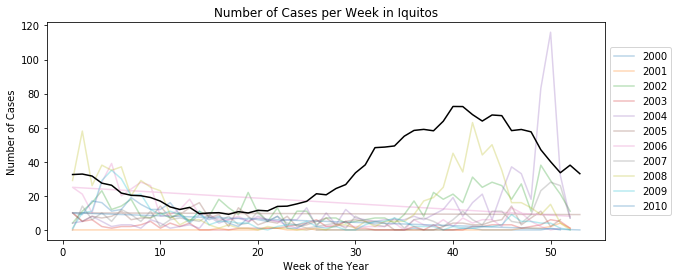

In [23]:

# plot cases for each week each year in Iquitos

for i in set(df_iq['year']):
    df = df_iq[df_iq['year'] == i]
    df.set_index('weekofyear', drop = True, inplace = True)
    plt.plot(df['total_cases'], alpha = .3)
    
df_sj.groupby('weekofyear')['total_cases'].mean().plot(c = 'k', figsize = (10,4))
plt.legend(set(df_iq['year']), loc='center left', bbox_to_anchor=(1, .5))

plt.title('Number of Cases per Week in Iquitos')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Cases')

# 7. Total cases over time overall

In [24]:
#find the relationship between total cases, city and (year, week of yer)
df_year_week = new_train_set[['year', 'weekofyear','total_cases']]
df_year_week.head()


,year,weekofyear,total_cases
0,1990,18,4
1,1990,19,5
2,1990,20,4
3,1990,21,3
4,1990,22,6


# 7.(1) Plot total cases over time overall

Text(0, 0.5, 'Number of Cases')

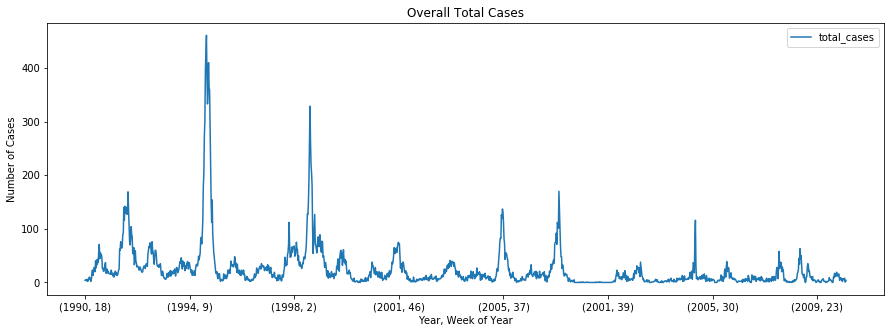

In [25]:
df_year_week = df_year_week.set_index(['year', 'weekofyear'])
#Plot Cases over time overall
df_year_week.plot(figsize = (15,5))
plt.title("Overall Total Cases")
plt.xlabel("Year, Week of Year")
plt.ylabel("Number of Cases")

# 7.(2) Plot total cases for each week and each year overall

Text(0, 0.5, 'Number of Cases')

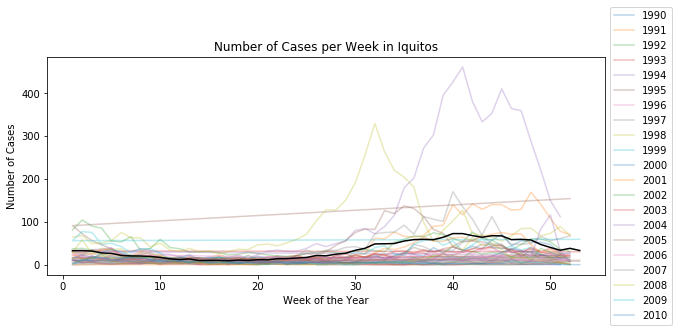

In [26]:

# plot cases for each week each year Overall

for i in set(new_train_set['year']):
    df = new_train_set[new_train_set['year'] == i]
    df.set_index('weekofyear', drop = True, inplace = True)
    plt.plot(df['total_cases'], alpha = .3)
    
df_sj.groupby('weekofyear')['total_cases'].mean().plot(c = 'k', figsize = (10,4))
plt.legend(set(new_train_set['year']), loc='center left', bbox_to_anchor=(1, .5))

plt.title('Number of Cases per Week in Iquitos')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Cases')

# 8. Find the trend with precipitation features

# 8.(1) Plot to see values for few fields that meausures precipitation over time

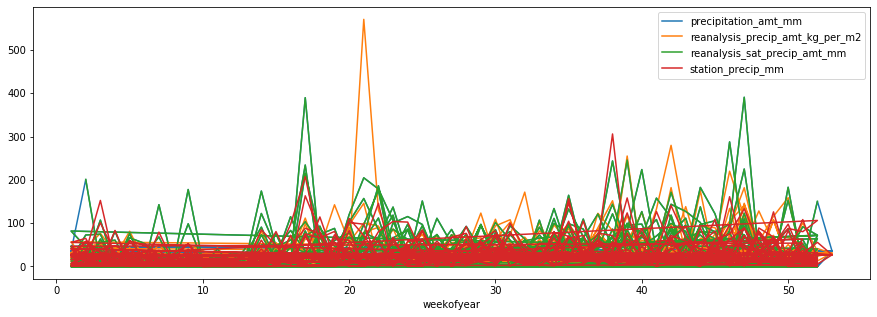

In [27]:
precip_sj = df_sj[["precipitation_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_sat_precip_amt_mm","station_precip_mm"]]

df_sj.plot(figsize = (15,5),x="weekofyear", y=["precipitation_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_sat_precip_amt_mm","station_precip_mm"])
plt.show()

# 8.(2) Check total cases and precipiation features

In [28]:
# Extract year/month/day from week_start_date just in case to see the trend depends on date
import datetime
df_sj['Year'] = pd.DatetimeIndex(df_sj['week_start_date']).year
df_sj['Month'] = pd.DatetimeIndex(df_sj['week_start_date']).month
df_sj['Day'] = pd.DatetimeIndex(df_sj['week_start_date']).day
df_sj.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,Year,Month,Day
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,1990,4,30
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,1990,5,7
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,1990,5,14
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,1990,5,21
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,1990,5,28


In [61]:
df_iq['Year'] = pd.DatetimeIndex(df_iq['week_start_date']).year
df_iq['Month'] = pd.DatetimeIndex(df_iq['week_start_date']).month
df_iq['Day'] = pd.DatetimeIndex(df_iq['week_start_date']).day
df_iq.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,Year,Month,Day
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,8.928571,26.400000,10.775000,32.5,20.7,3.0,0,2000,7,1
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,10.314286,26.900000,11.566667,34.0,20.8,55.6,0,2000,7,8
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,7.385714,26.800000,11.466667,33.0,20.7,38.1,0,2000,7,15
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,9.114286,25.766667,10.533333,31.5,14.7,30.0,0,2000,7,22
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,9.500000,26.600000,11.480000,33.3,19.1,4.0,0,2000,7,29


# 8.(3) Plot total cases and precipiation features based on each month

In [52]:
precip_sj_month = df_sj[["Month","weekofyear","total_cases","precipitation_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_sat_precip_amt_mm","station_precip_mm"]]
precip_sj_month.head()

,Month,weekofyear,total_cases,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_sat_precip_amt_mm,station_precip_mm
0,4,18,4,12.42,32.00,12.42,16.0
1,5,19,5,22.82,17.94,22.82,8.6
2,5,20,4,34.54,26.10,34.54,41.4
3,5,21,3,15.36,13.90,15.36,4.0
4,5,22,6,7.52,12.20,7.52,5.8


In [66]:
precip_iq_month = df_iq[["Month","weekofyear","total_cases","precipitation_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_sat_precip_amt_mm","station_precip_mm"]]
precip_sj_month.head()

,Month,weekofyear,total_cases,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_sat_precip_amt_mm,station_precip_mm
0,4,18,4,12.42,32.00,12.42,16.0
1,5,19,5,22.82,17.94,22.82,8.6
2,5,20,4,34.54,26.10,34.54,41.4
3,5,21,3,15.36,13.90,15.36,4.0
4,5,22,6,7.52,12.20,7.52,5.8


In [46]:
precip_sj_month.describe()

,Month,weekofyear,total_cases,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_sat_precip_amt_mm,station_precip_mm
count,936.000000,936.000000,936.000000,936.000000,936.000000,927.000000,936.000000
mean,6.418803,26.503205,34.180556,35.470809,30.465419,35.470809,26.785484
std,3.452942,15.021909,51.381372,44.390936,35.513556,44.606137,29.231566
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,13.750000,9.000000,0.000000,10.900000,0.000000,6.900000
50%,6.500000,26.500000,19.000000,21.435000,21.405000,20.800000,17.950000
75%,9.000000,39.250000,37.000000,51.662500,36.925000,52.180000,35.300000
max,12.000000,53.000000,461.000000,390.600000,570.500000,390.600000,305.900000


In [67]:
precip_iq_month.describe()

,Month,weekofyear,total_cases,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_sat_precip_amt_mm,station_precip_mm
count,520.000000,520.000000,520.000000,520.000000,520.000000,516.000000,520.000000
mean,6.417308,26.503846,7.565385,64.245736,57.609864,64.245736,62.467262
std,3.453083,15.029450,10.765478,35.083014,50.092398,35.218995,62.263437
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,13.750000,1.000000,39.147500,24.212500,39.105000,18.000000
50%,6.500000,26.500000,5.000000,60.505000,46.680000,60.470000,47.750000
75%,9.000000,39.250000,9.000000,85.637500,70.432500,85.757500,83.350000
max,12.000000,53.000000,116.000000,210.830000,362.030000,210.830000,543.300000


Text(0.5, 0, 'Month of Year')

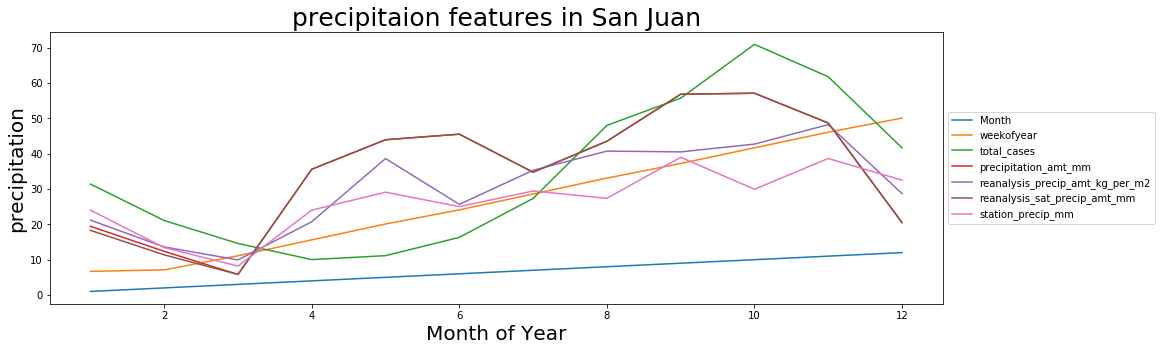

In [57]:
for i in (precip_sj):
    precip_sj_month.groupby("Month")[i].mean()\
    .plot(figsize = (16, 5))\
    .legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc = 'best')
plt.title('precipitaion features in San Juan', size = 25)
plt.ylabel('precipitation', size = 20)
plt.xlabel('Month of Year', size = 20)

Text(0.5, 0, 'Month of Year')

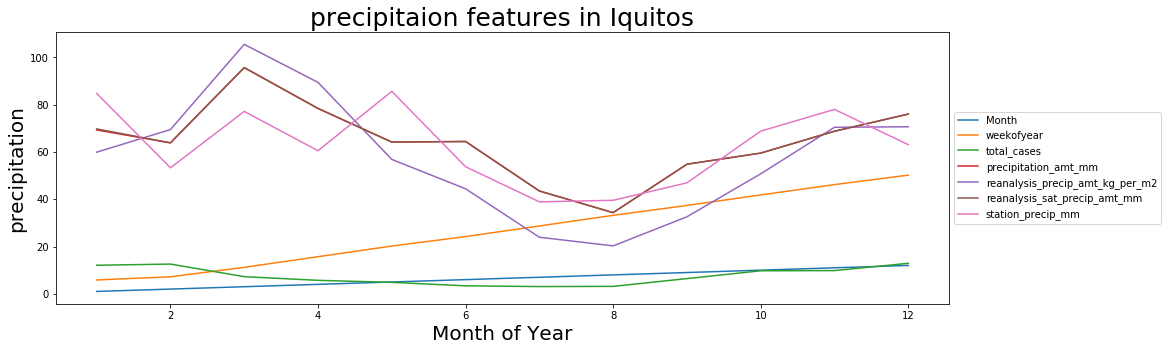

In [69]:
for i in (precip_sj):
    precip_iq_month.groupby("Month")[i].mean()\
    .plot(figsize = (16, 5))\
    .legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc = 'best')
plt.title('precipitaion features in Iquitos', size = 25)
plt.ylabel('precipitation', size = 20)
plt.xlabel('Month of Year', size = 20)

# 8.(4) Plot total cases and precipiation features based on each year

In [50]:
precip_sj_year = df_sj[["Year","Month","weekofyear","total_cases","precipitation_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_sat_precip_amt_mm","station_precip_mm"]]
precip_sj_year.head()

,Year,Month,weekofyear,total_cases,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_sat_precip_amt_mm,station_precip_mm
0,1990,4,18,4,12.42,32.00,12.42,16.0
1,1990,5,19,5,22.82,17.94,22.82,8.6
2,1990,5,20,4,34.54,26.10,34.54,41.4
3,1990,5,21,3,15.36,13.90,15.36,4.0
4,1990,5,22,6,7.52,12.20,7.52,5.8


In [62]:
precip_iq_year = df_iq[["Year","Month","weekofyear","total_cases","precipitation_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_sat_precip_amt_mm","station_precip_mm"]]
precip_iq_year.head()

,Year,Month,weekofyear,total_cases,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_sat_precip_amt_mm,station_precip_mm
936,2000,7,26,0,25.41,43.19,25.41,3.0
937,2000,7,27,0,60.61,46.00,60.61,55.6
938,2000,7,28,0,55.52,64.77,55.52,38.1
939,2000,7,29,0,5.60,23.96,5.60,30.0
940,2000,7,30,0,62.76,31.80,62.76,4.0


In [54]:
precip_sj_year.describe()

,Year,Month,weekofyear,total_cases,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_sat_precip_amt_mm,station_precip_mm
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,927.000000,936.000000
mean,1998.826923,6.418803,26.503205,34.180556,35.470809,30.465419,35.470809,26.785484
std,5.212076,3.452942,15.021909,51.381372,44.390936,35.513556,44.606137,29.231566
min,1990.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,3.750000,13.750000,9.000000,0.000000,10.900000,0.000000,6.900000
50%,1999.000000,6.500000,26.500000,19.000000,21.435000,21.405000,20.800000,17.950000
75%,2003.000000,9.000000,39.250000,37.000000,51.662500,36.925000,52.180000,35.300000
max,2008.000000,12.000000,53.000000,461.000000,390.600000,570.500000,390.600000,305.900000


In [63]:
precip_iq_year.describe()

,Year,Month,weekofyear,total_cases,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_sat_precip_amt_mm,station_precip_mm
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,516.000000,520.000000
mean,2005.000000,6.417308,26.503846,7.565385,64.245736,57.609864,64.245736,62.467262
std,2.918283,3.453083,15.029450,10.765478,35.083014,50.092398,35.218995,62.263437
min,2000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2002.750000,3.750000,13.750000,1.000000,39.147500,24.212500,39.105000,18.000000
50%,2005.000000,6.500000,26.500000,5.000000,60.505000,46.680000,60.470000,47.750000
75%,2007.250000,9.000000,39.250000,9.000000,85.637500,70.432500,85.757500,83.350000
max,2010.000000,12.000000,53.000000,116.000000,210.830000,362.030000,210.830000,543.300000


Text(0.5, 0, 'Year')

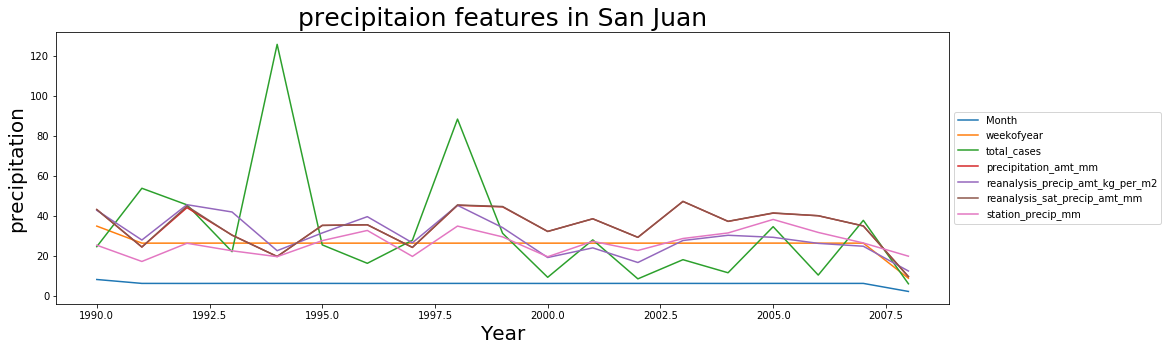

In [58]:
for i in (precip_sj):
    precip_sj_year.groupby("Year")[i].mean()\
    .plot(figsize = (16, 5))\
    .legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc = 'best')
plt.title('precipitaion features in San Juan', size = 25)
plt.ylabel('precipitation', size = 20)
plt.xlabel('Year', size = 20)

Text(0.5, 0, 'Year')

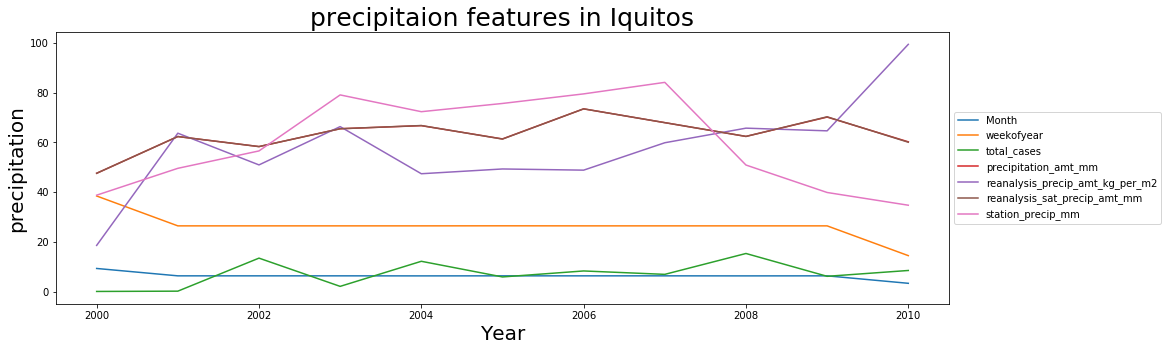

In [72]:
for i in (precip_sj):
    precip_iq_year.groupby("Year")[i].mean()\
    .plot(figsize = (16, 5))\
    .legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc = 'best')
plt.title('precipitaion features in Iquitos', size = 25)
plt.ylabel('precipitation', size = 20)
plt.xlabel('Year', size = 20)

# 9. Find correation in Precipiation features, Humidity and total cases in two different dataset (San Juan, Iquitos)

# 9.(1) Correlations in San Juan

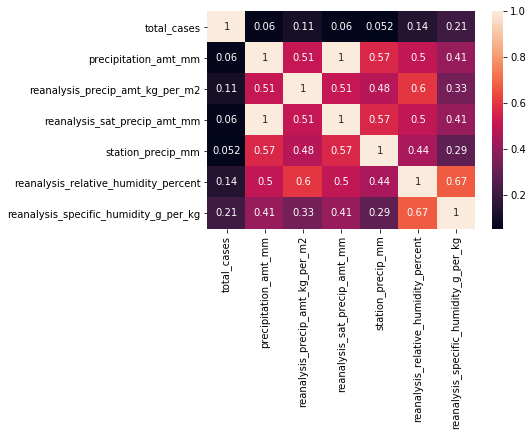

In [78]:
df = pd.DataFrame(df_sj,columns=["total_cases","precipitation_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_sat_precip_amt_mm","station_precip_mm","reanalysis_relative_humidity_percent","reanalysis_specific_humidity_g_per_kg"])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# 9.(1) Correlations in Iquitos

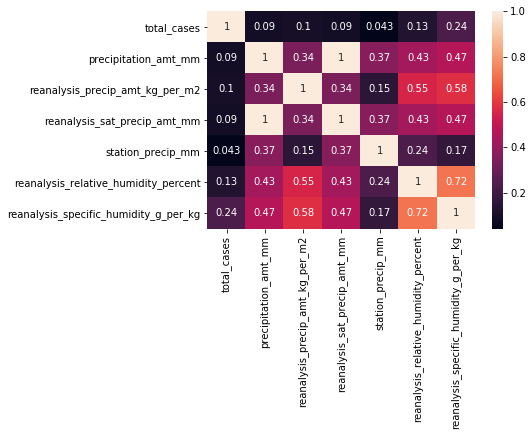

In [79]:
df = pd.DataFrame(df_iq,columns=["total_cases","precipitation_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_sat_precip_amt_mm","station_precip_mm","reanalysis_relative_humidity_percent","reanalysis_specific_humidity_g_per_kg"])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()